In [168]:
#Remote Work's affect on Social Isolation and Work Life Balance

###Remote Work and Social Isolation Findings###
#Overall remote work seems to have very little affect on how workers precieve their level of social isolation
#The average(mean) rating only varies by .03 or 1% 
#Remote work did however have the highest standard deviation and was the only work location where the mode was 5(most isolated)

#Key takeaway - while on average remote work has little affect on someone's precieved social isolation it is more likely to cause a feeling of being
#very socialy isolated to an individual compared to hybrid or onsite work

###Remote Work and Work Life Balance###
#Like Social Isolation it appears that remote work does not have much affect on precieved work life balance overall
#Across the three work location we only see a .14 or 4.75% in the average(mean) rating

#Similar to Social Isolation remote work did however have the highest standard deviation and was again the only work location that 
#had a mode of 5 (very unbalnced work life balance)

###Overall Findings###
#Remote Work does not have a significant impact on either precieved Social Isolation or Work Life Balance
#However of the three types of work looked at(Remote, Hybrid, Onsite) it was the most likely to produce responces on the extremes

#These findings show that with a significant enough sample size you will see little impact from remote work on Social Isolation and Work Life Balance
#However on an individual to individual basis you are more likely to see a strong affect vs. other locations of work
#Further study would be required to determine what differnces amoung individuals causes this reaction to remote work.

In [169]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import textwrap

In [170]:
#Create a path to the csv and put it into Pandas DataFrame
csv_path = Path("Resources/Impact_of_Remote_Work_on_Mental_Health.csv")
remote_work_mental_health_df = pd.read_csv(csv_path)

remote_work_mental_health_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [171]:
#Filter Dataframe to only include Results from North America
filtered_df = remote_work_mental_health_df[remote_work_mental_health_df["Region"] == "North America"]

filtered_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,Low,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America


In [172]:
#Create pivot table of social isolation response by work location

Social_Isolation_Rating_Counts = filtered_df.pivot_table(
    index="Work_Location",
    columns="Social_Isolation_Rating",
    aggfunc="size",
    fill_value=0
)

print(Social_Isolation_Rating_Counts)

Social_Isolation_Rating   1   2   3   4   5
Work_Location                              
Hybrid                   47  55  56  58  45
Onsite                   53  48  42  57  52
Remote                   55  54  46  51  58


In [173]:
# Calculate mean, median, and mode of social isolation responces for each work location
statistics = filtered_df.groupby("Work_Location")["Social_Isolation_Rating"].agg(["mean", "std"])
statistics["mode"] = filtered_df.groupby("Work_Location")["Social_Isolation_Rating"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Round mean & std
statistics["mean"] = statistics["mean"].round(2)
statistics['std'] = statistics['std'].round(2)

print(statistics)

               mean   std  mode
Work_Location                  
Hybrid         3.00  1.36     4
Onsite         3.03  1.45     4
Remote         3.01  1.46     5


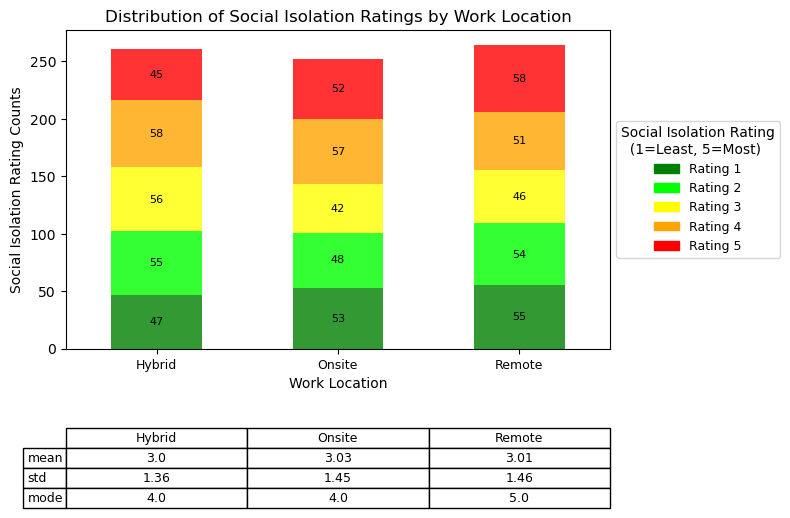

In [174]:
#create stacked bar chart for social isolation ranting by work location

#create color scale for ratings
colors = ["green", "lime", "yellow", "orange", "red"]

#plot stacked bar chart
fig, ax = plt.subplots(figsize=(8,6))
bars = Social_Isolation_Rating_Counts.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    color=colors,
    alpha=0.8,
    ax=ax
)

# Insert count value in each bar segment
for i, location in enumerate(Social_Isolation_Rating_Counts.index):
    cumulative_height = 0  
    for rating, count in Social_Isolation_Rating_Counts.loc[location].items():
        if count > 0:  
            ax.text(
                x=i, 
                y=cumulative_height + count / 2,  
                s=str(count),  
                ha="center", 
                va="center", 
                fontsize=8, 
                color="black"  
            )
        cumulative_height += count  
        
#customize the chart labels
ax.set_title("Distribution of Social Isolation Ratings by Work Location", fontsize=12)
ax.set_xlabel("Work Location", fontsize=10)
ax.set_ylabel("Social Isolation Rating Counts", fontsize=10)
ax.set_xticklabels(Social_Isolation_Rating_Counts.index, rotation=0, fontsize=9)


# Create a legend beside the chart
legend_labels = [mpatches.Patch(color=color, label=f'Rating {i+1}') for i, color in enumerate(colors)]
ax.legend(
    handles=legend_labels, 
    title="Social Isolation Rating\n  (1=Least, 5=Most)", 
    fontsize=9, 
    title_fontsize=10, 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

# Transpose the statistics DataFrame to swap rows and columns
statistics_transposed = statistics.transpose()

# Add a table below the chart to display the statistics
table = plt.table(
    cellText=statistics_transposed.values,  
    rowLabels=statistics_transposed.index,  
    colLabels=statistics_transposed.columns, 
    cellLoc="center",
    loc="bottom",
    bbox=[0.0, -0.5, 1.0, 0.25] 
)

# Format the table for better readability
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

In [175]:
# Group the data by Work Location and get the count of each Work-Life Balance Rating (1-5)
work_locations = ["Onsite", "Hybrid", "Remote"]
Work_Life_Balance_Rating_Counts = {}

# Get the counts of each rating (1-5) for the current work location
for location in work_locations:
    Work_Life_Balance_Rating_Counts[location] = filtered_df[filtered_df["Work_Location"] == location]["Work_Life_Balance_Rating"].value_counts().sort_index()

Work_Life_Balance_Rating_Counts

{'Onsite': Work_Life_Balance_Rating
 1    41
 2    56
 3    61
 4    46
 5    48
 Name: count, dtype: int64,
 'Hybrid': Work_Life_Balance_Rating
 1    52
 2    44
 3    62
 4    52
 5    51
 Name: count, dtype: int64,
 'Remote': Work_Life_Balance_Rating
 1    61
 2    60
 3    41
 4    55
 5    47
 Name: count, dtype: int64}

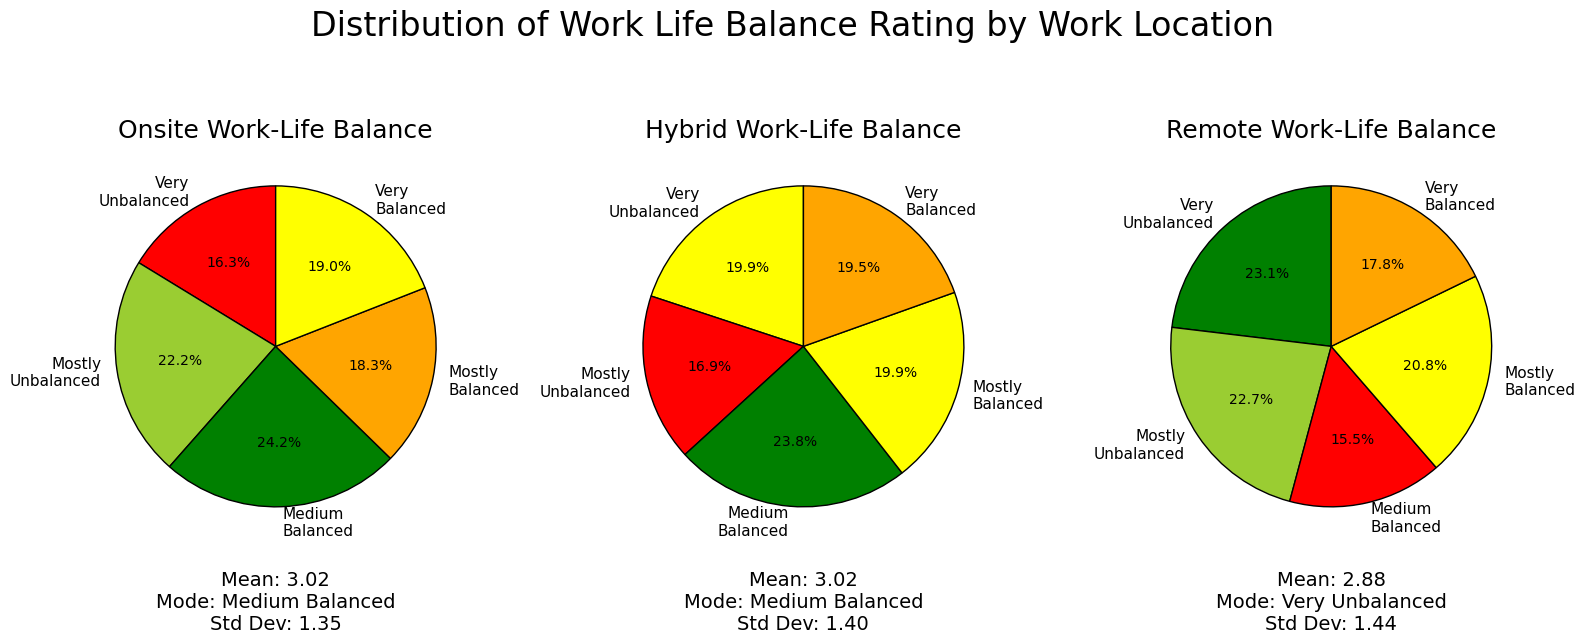

In [166]:
#Create 3 side by side pie charts, 1 for each location, based on work life balance ratings

# Define custom labels for the ratings 1-5, 1 being most unblanced and 5 being most balanced
custom_labels = {
    1: "Very Unbalanced",
    2: "Mostly Unbalanced",
    3: "Medium Balanced",
    4: "Mostly Balanced",
    5: "Very Balanced"
}

# Function to wrap text
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

# Function to generate a color map based on percentages
def get_color_map(percentages):
   
    # Sort percentages in descending order
    sorted_percentages = sorted(percentages, reverse=True)
    
    # Assign colors based on highest to lowest percentage 
    color_map = ["green", "yellowgreen", "yellow", "orange", "red"]
    
    # Assign color based on sorted percentages
    color_mapping = {}
    for idx, percentage in enumerate(sorted_percentages):
        color_mapping[percentage] = color_map[idx]
    
    # Ensure the original percentage order is maintained(used to fix issue of colors being random)
    sorted_colors = [color_mapping[percentage] for percentage in percentages]
    
    return sorted_colors

# Increase the figure size to make the charts larger
fig, axes = plt.subplots(1, 3, figsize=(16, 8))  

# Loop through each work location
for ax, location in zip(axes, work_locations):
    # Filter the data for the current work location
    location_data = filtered_df[filtered_df["Work_Location"] == location]["Work_Life_Balance_Rating"]
    
    # Count ratings (1-5) based on location
    rating_counts = location_data.value_counts().sort_index()
    
    # Calculate percentages
    percentages = rating_counts / rating_counts.sum() * 100

     # Assign custom colors based on percentages
    colors = get_color_map(percentages)
    
    # Change ratings 1-5 to custom labels and wrap the text to better fit and not overlap
    rating_labels = [custom_labels[i] for i in rating_counts.index]
    wrapped_labels = wrap_labels(rating_labels, width=10)  
    
    # Plot the pie chart
    wedges, texts, autotexts = ax.pie(
        percentages,
        labels=wrapped_labels,  # Use wrapped labels here
        colors = colors,
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops={"edgecolor": "black"}
    )

     # Increase the font size of the labels
    for text in texts:
        text.set_fontsize(11)
        
    # Set the title for the pie chart
    ax.set_title(f'{location} Work-Life Balance', fontsize=18)  
    
    # Calculate Mean, Mode and STD
    mean = location_data.mean()
    mode = location_data.mode().iloc[0] if not location_data.mode().empty else 'N/A'
    std_dev = location_data.std()
    
    # Add statistics below the pie chart
    ax.text(
        0, -1.4,  # Adjusted text position for larger charts
        f"Mean: {mean:.2f}\nMode: {custom_labels.get(mode, "N/A")}\nStd Dev: {std_dev:.2f}",
        fontsize=14, ha="center", va="top"
    )

# Add Title for entire visual
plt.suptitle("Distribution of Work Life Balance Rating by Work Location", fontsize=24)  

# Adjust layout and print visual
plt.tight_layout()
plt.subplots_adjust(top=1.1)  
plt.show()